In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']

X = digits['images']
X = X[y < 2]
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

y = y[y < 2]

print(y[:5])

360 (8, 8)
[0 1 0 1 0]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([178, 182]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=(10, 10), 
                     n_layers=3,
                     n_classes=2,
                     activation_func=lambda x: torch.softmax(x, dim=0),
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 14.8 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=32, n_epochs=1000)

Epoch 1 of 1000 - train_loss: 0.6616 - train_acc: 0.8333 - val_loss: 0.6908 - val_acc: 0.8103
Epoch 2 of 1000 - train_loss: 0.6539 - train_acc: 1.0000 - val_loss: 0.6901 - val_acc: 0.8448
Epoch 3 of 1000 - train_loss: 0.6465 - train_acc: 1.0000 - val_loss: 0.6894 - val_acc: 0.8621
Epoch 4 of 1000 - train_loss: 0.6392 - train_acc: 1.0000 - val_loss: 0.6887 - val_acc: 0.8793
Epoch 5 of 1000 - train_loss: 0.6321 - train_acc: 1.0000 - val_loss: 0.6879 - val_acc: 0.8966
Epoch 6 of 1000 - train_loss: 0.6252 - train_acc: 1.0000 - val_loss: 0.6872 - val_acc: 0.9310
Epoch 7 of 1000 - train_loss: 0.6189 - train_acc: 1.0000 - val_loss: 0.6865 - val_acc: 0.9483
Epoch 8 of 1000 - train_loss: 0.6129 - train_acc: 1.0000 - val_loss: 0.6858 - val_acc: 0.9483
Epoch 9 of 1000 - train_loss: 0.6073 - train_acc: 1.0000 - val_loss: 0.6852 - val_acc: 0.9655
Epoch 10 of 1000 - train_loss: 0.6020 - train_acc: 1.0000 - val_loss: 0.6846 - val_acc: 0.9655
Epoch 11 of 1000 - train_loss: 0.5971 - train_acc: 1.0000 -

Epoch 87 of 1000 - train_loss: 0.5565 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 88 of 1000 - train_loss: 0.5564 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 89 of 1000 - train_loss: 0.5563 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 90 of 1000 - train_loss: 0.5562 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 91 of 1000 - train_loss: 0.5561 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 92 of 1000 - train_loss: 0.5560 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 93 of 1000 - train_loss: 0.5559 - train_acc: 1.0000 - val_loss: 0.6785 - val_acc: 0.9655
Epoch 94 of 1000 - train_loss: 0.5558 - train_acc: 1.0000 - val_loss: 0.6784 - val_acc: 0.9655
Epoch 95 of 1000 - train_loss: 0.5557 - train_acc: 1.0000 - val_loss: 0.6784 - val_acc: 0.9655
Epoch 96 of 1000 - train_loss: 0.5556 - train_acc: 1.0000 - val_loss: 0.6784 - val_acc: 0.9655
Epoch 97 of 1000 - train_loss: 0.5555 - train_acc:

Epoch 175 of 1000 - train_loss: 0.5501 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 176 of 1000 - train_loss: 0.5501 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 177 of 1000 - train_loss: 0.5500 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 178 of 1000 - train_loss: 0.5500 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 179 of 1000 - train_loss: 0.5499 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 180 of 1000 - train_loss: 0.5498 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 181 of 1000 - train_loss: 0.5498 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 182 of 1000 - train_loss: 0.5497 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 183 of 1000 - train_loss: 0.5497 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 184 of 1000 - train_loss: 0.5496 - train_acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.9828
Epoch 185 of 1000 - train_loss: 0.5496 -

Epoch 262 of 1000 - train_loss: 0.5467 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 263 of 1000 - train_loss: 0.5466 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 264 of 1000 - train_loss: 0.5466 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 265 of 1000 - train_loss: 0.5466 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 266 of 1000 - train_loss: 0.5466 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 267 of 1000 - train_loss: 0.5466 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 268 of 1000 - train_loss: 0.5465 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 269 of 1000 - train_loss: 0.5465 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 270 of 1000 - train_loss: 0.5465 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 271 of 1000 - train_loss: 0.5465 - train_acc: 1.0000 - val_loss: 0.6770 - val_acc: 0.9828
Epoch 272 of 1000 - train_loss: 0.5465 -

Epoch 350 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 351 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 352 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 353 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 354 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 355 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 356 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 357 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 358 of 1000 - train_loss: 0.5453 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 359 of 1000 - train_loss: 0.5452 - train_acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.9828
Epoch 360 of 1000 - train_loss: 0.5452 -

Epoch 437 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 438 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 439 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 440 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 441 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 442 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 443 of 1000 - train_loss: 0.5448 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 444 of 1000 - train_loss: 0.5447 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 445 of 1000 - train_loss: 0.5447 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 446 of 1000 - train_loss: 0.5447 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 447 of 1000 - train_loss: 0.5447 -

Epoch 525 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 526 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 527 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 528 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 529 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 530 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 531 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 532 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 533 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 534 of 1000 - train_loss: 0.5445 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 535 of 1000 - train_loss: 0.5445 -

Epoch 612 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 613 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 614 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 615 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 616 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 617 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 618 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 619 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 620 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 621 of 1000 - train_loss: 0.5444 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 622 of 1000 - train_loss: 0.5444 -

Epoch 699 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 700 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 701 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 702 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 703 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 704 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 705 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 706 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 707 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 708 of 1000 - train_loss: 0.5443 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 709 of 1000 - train_loss: 0.5443 -

Epoch 786 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 787 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 788 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 789 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 790 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 791 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 792 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 793 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 794 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 795 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 796 of 1000 - train_loss: 0.5442 -

Epoch 873 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 874 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 875 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 876 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 877 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 878 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 879 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 880 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 881 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 882 of 1000 - train_loss: 0.5442 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 883 of 1000 - train_loss: 0.5442 -

Epoch 961 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 962 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 963 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 964 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 965 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 966 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 967 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 968 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 969 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 970 of 1000 - train_loss: 0.5441 - train_acc: 1.0000 - val_loss: 0.6767 - val_acc: 0.9828
Epoch 971 of 1000 - train_loss: 0.5441 -

In [7]:
y_pred = clf.predict(X_test)

In [8]:
clf.score(X_test, y_test)

tensor(1.)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       1.00      1.00      1.00        37

avg / total       1.00      1.00      1.00        72



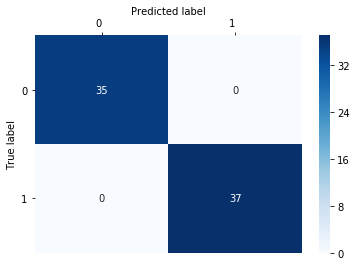

In [10]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

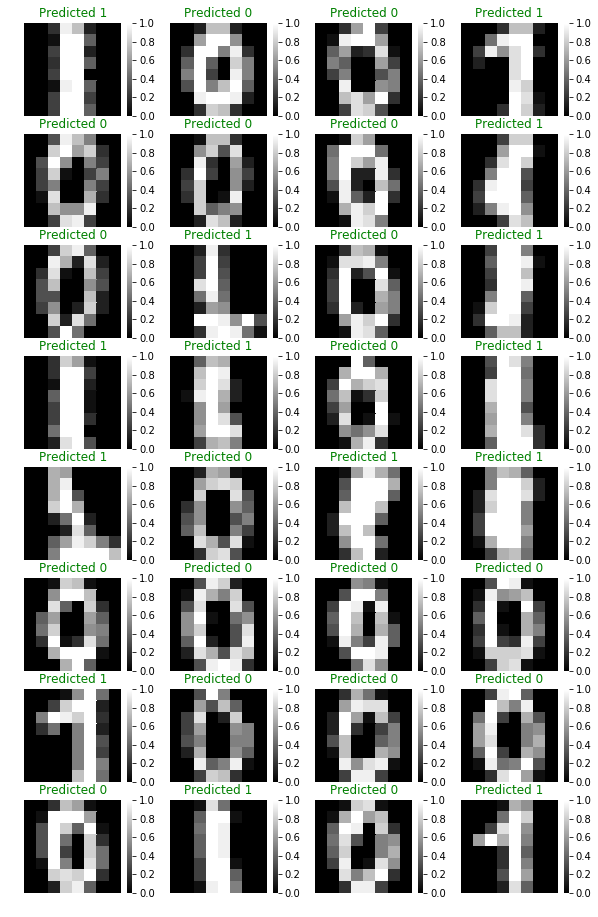

In [11]:
n_rows = 8
n_cols = 4
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2.7
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('Predicted %d' % actual, color=color)

plt.show()

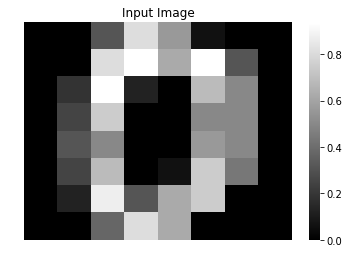

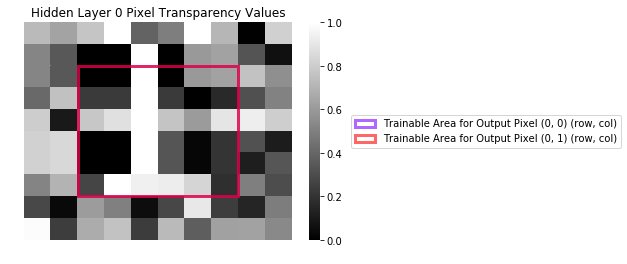

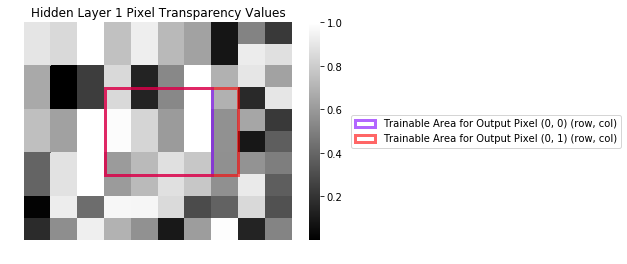

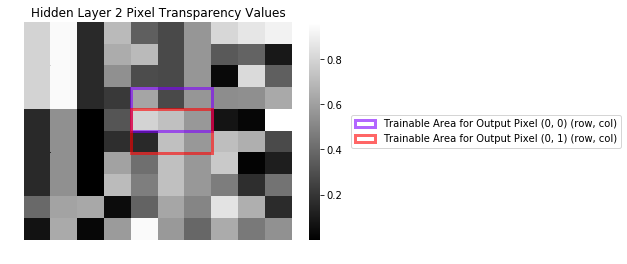

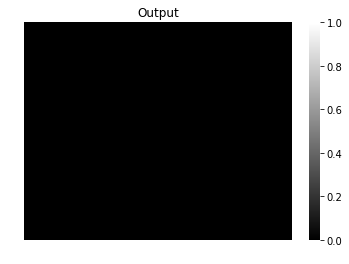

In [12]:
# TODO: Fix this plot.

colors = plt.cm.rainbow(np.linspace(0,1,clf.output_layer.n_rows * clf.output_layer.n_cols))
        
ax = sns.heatmap(X[0], cmap='gray')
ax.set(title='Input Image')
ax.set_axis_off()
plt.show()

for i, layer in enumerate(clf.hidden_layers):              
    ax = sns.heatmap(layer.pixel_values, cmap='gray')
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 1
            width = (max_extent[1] - min_extent[1]) + 1
            
            rect = patches.Rectangle(min_extent, width, height, 
                                     linewidth=3, alpha=0.6, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel (%d, %d) (row, col)' % (row, col))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % i)
        ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        plt.show()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, vmax=1, cmap='gray')
ax.set(title='Output')
ax.set_axis_off()
plt.show()